### Working Pansharpening Algorithm

In [1]:
import quality
import wald
import pansharpening
import importlib
import pandas as pd
import cv2
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from utils import plot, hist, enhance

In [251]:
"remove_cell"

# test
print("a")
1+1

a


2

In [66]:
# Loading the images
Bs = glob("Images/*.tif")
B = cv2.imread(Bs[3], 0)
G = cv2.imread(Bs[4], 0)
R = cv2.imread(Bs[5], 0)

# PAN & BGR bands (full size)
PAN = cv2.imread(Bs[9], 0)
BGR_lowres = np.stack((B, G, R), -1)

# Cropping the bands
mask = {"y1":2300, "y2":2600, "x1":4000, "x2":4300}
PAN = PAN[mask["y1"]:mask["y2"], mask["x1"]:mask["x2"]]
mask = {k:int(mask[k]/2) for k in mask}
BGR_lowres = BGR_lowres[mask["y1"]:mask["y2"], mask["x1"]:mask["x2"]]

# Running all pansharpening methods on the images
panned = []
panned_names = []
panned_results = []

for i in ["Nearest", "Linear"]:
    
    # Interpolation depending on the method
    if i == "Nearest": 
        BGR = cv2.resize(BGR_lowres, None, fx=2, fy=2, interpolation=cv2.INTER_NEAREST)
    elif i == "Linear": 
        BGR = cv2.resize(BGR_lowres, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

    # Pansharpening
    BS_Ihs = pansharpening.Ihs(BS=BGR, PAN=PAN, f_ratio=2, hist_matching=True)
    BS_Gihs = pansharpening.Gihs(BS=BGR, PAN=PAN, f_ratio=2, hist_matching=True)
    BS_Gs = pansharpening.Gs(BS=BGR, PAN=PAN, f_ratio=2, hist_matching=True)
    BS_Pca = pansharpening.Pca(BS=BGR, PAN=PAN, f_ratio=2, hist_matching=True)
    BS_Wavelet = pansharpening.Wavelet(BS=BGR, PAN=PAN, f_ratio=2, hist_matching=True)
    BS_Brovey = pansharpening.Brovey(BS=BGR, PAN=PAN, f_ratio=2, weights=[1,1,1])
    BS_Dummy = pansharpening.DummyPansharpening(BS=BGR, PAN=PAN, f_ratio=2)

    panned.append(BS_Ihs.transform())
    panned_names.append((i,"Ihs"))
    panned.append(BS_Gihs.transform())
    panned_names.append((i, "Gihs"))
    panned.append(BS_Gs.transform())
    panned_names.append((i,"Gs"))
    panned.append(BS_Pca.transform())
    panned_names.append((i,"Pca"))
    panned.append(BS_Wavelet.transform())
    panned_names.append((i,"Wavelet"))
    panned.append(BS_Brovey.transform())
    panned_names.append((i,"Brovey"))
    panned.append(BS_Dummy.transform())
    panned_names.append((i,"Dummy"))

    panned_results.append(BS_Ihs.evaluate())
    panned_results.append(BS_Gihs.evaluate())
    panned_results.append(BS_Gs.evaluate())
    panned_results.append(BS_Pca.evaluate())
    panned_results.append(BS_Wavelet.evaluate())
    panned_results.append(BS_Brovey.evaluate())
    panned_results.append(BS_Dummy.evaluate())
    


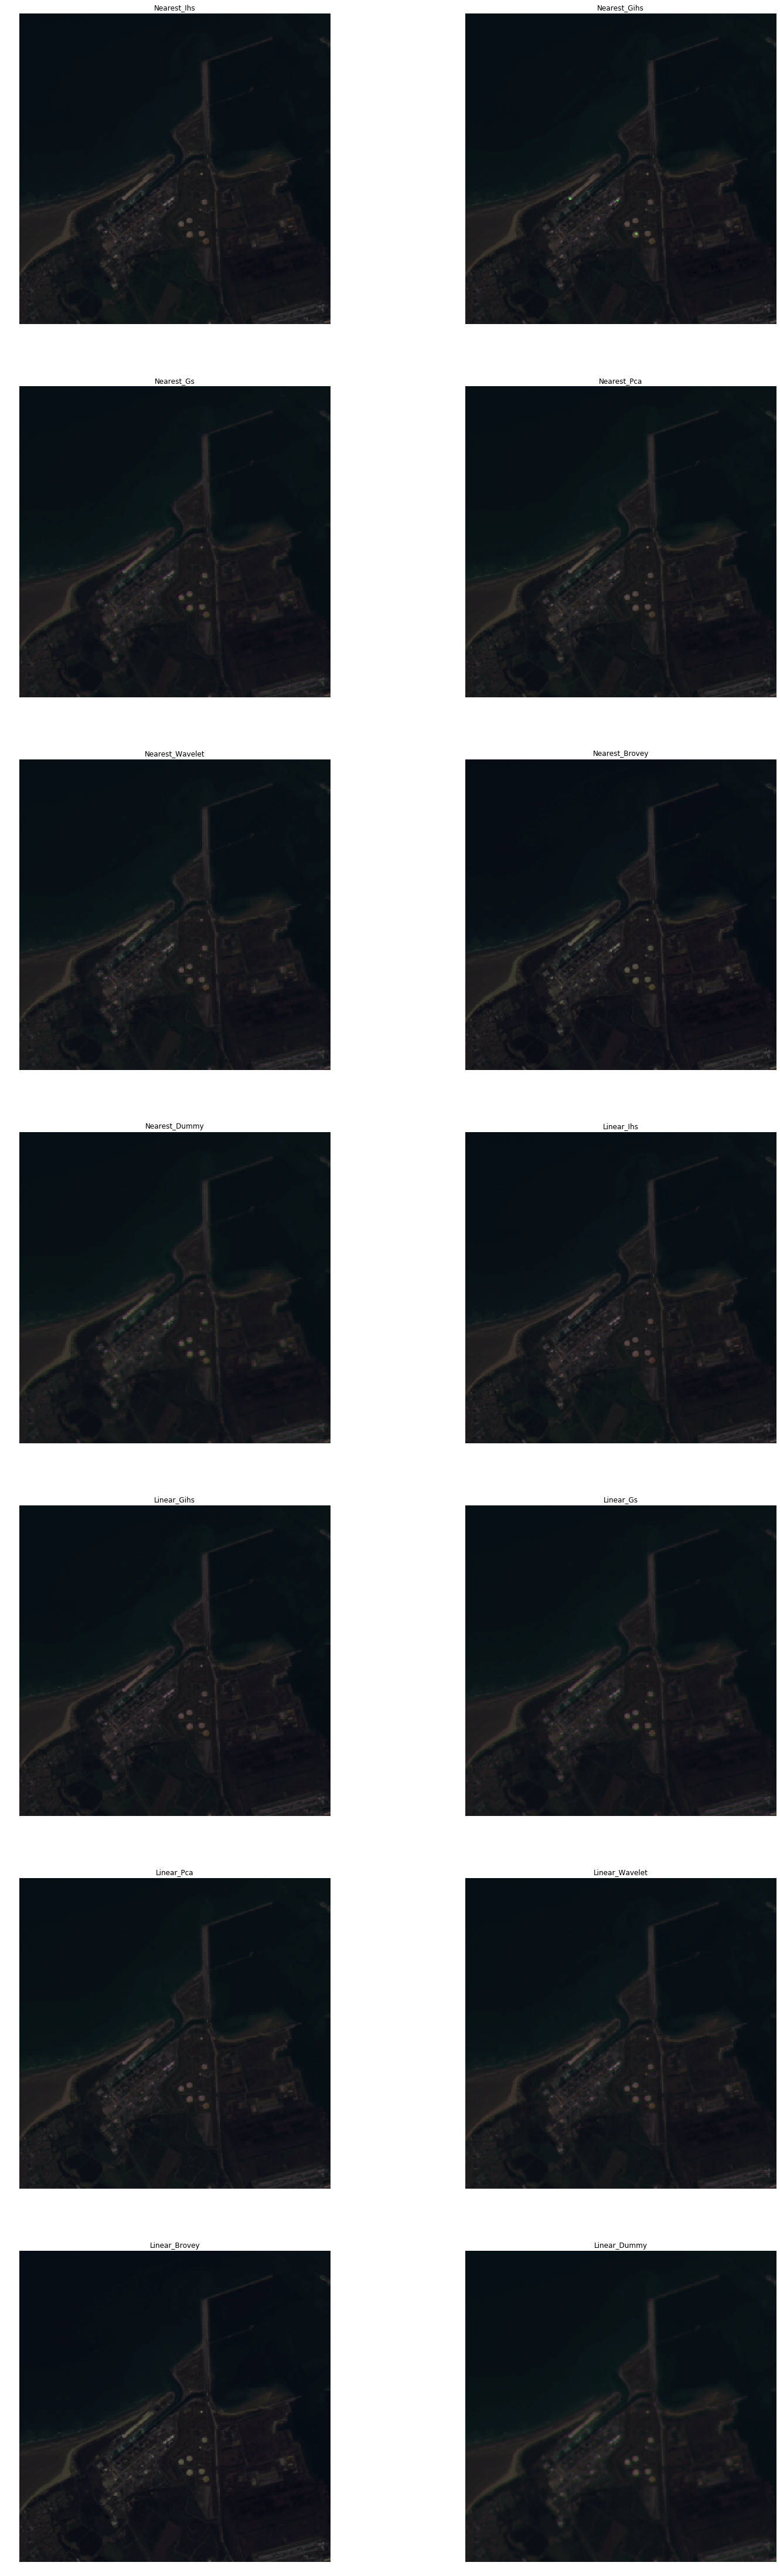

In [67]:
cols = 2
plot(
    imgs=panned,
    subplots_shape = [np.ceil(len(panned_names)/cols).astype(int),cols],
    figsize1=25,figsize2=80,
    brightness=0.1, 
    contrast=0.1,
    colorbar=False, 
    titles=["_".join(i) for i in panned_names]
)

In [72]:
panned_results = pd.DataFrame(panned_results, index = panned_names)
panned_results["interpolation"] = panned_results.index.str[0]
panned_results["method"] = panned_results.index.str[1]
panned_results

,ERGAS,Q2N,RASE,RMSEs,SAM,interpolation,method
"(Nearest, Ihs)",21.052579,0.950677,2.971002,"[1.7289688641885177, 1.780636590286369, 1.9012...",70.311024,Nearest,Ihs
"(Nearest, Gihs)",18.261551,0.959813,2.585392,"[1.499110847580436, 1.5093339222613693, 1.6948...",70.310388,Nearest,Gihs
"(Nearest, Gs)",15.310086,0.975064,2.119850,"[1.0374755686547783, 1.1850175807415968, 1.595...",70.312242,Nearest,Gs
"(Nearest, Pca)",17.834527,0.967569,2.465018,"[1.1365053648991035, 1.3609310538500228, 1.928...",70.318353,Nearest,Pca
"(Nearest, Wavelet)",21.449651,0.948426,3.004624,"[1.5651623983898073, 1.74243762840708, 2.12668...",70.310802,Nearest,Wavelet
"(Nearest, Brovey)",28.781405,0.955064,3.951398,"[2.553072223376726, 2.4295221295097886, 2.2640...",70.308375,Nearest,Brovey
"(Nearest, Dummy)",21.930195,0.948204,3.061453,"[1.4505324692830714, 1.7537895477444772, 2.305...",70.313219,Nearest,Dummy
"(Linear, Ihs)",25.558844,0.921931,3.605267,"[2.0663225519963935, 2.1671486643360054, 2.323...",70.311608,Linear,Ihs
"(Linear, Gihs)",23.430102,0.929921,3.316854,"[1.8862543719115816, 1.9598185857086081, 2.179...",70.311024,Linear,Gihs
"(Linear, Gs)",16.492886,0.967505,2.306416,"[1.1865168444747096, 1.3145003275431737, 1.662...",70.312844,Linear,Gs


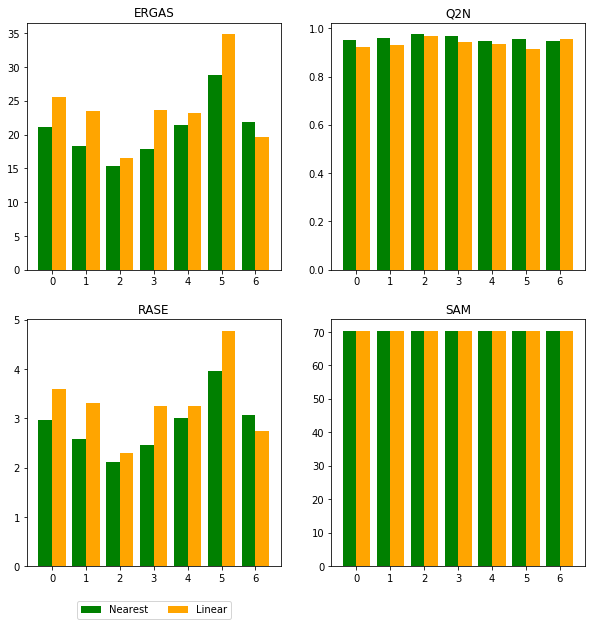

In [249]:
quality = [col for col in panned_results.columns if col not in ["interpolation", 'method', 'RMSEs']]
interpolations = panned_results["interpolation"].unique()
num = len(interpolations)
width = 0.8/num
bar_placement = np.linspace(-0.4+width/2, 0.4-width/2, num=num)
ncols = 2
nrows = np.ceil(len(quality)/ncols).astype(int)
fig, axes = plt.subplots(nrows=nrows,ncols=ncols,figsize=(10,10))
iterator = 0
colors = ["green", "orange", "blue", "red"]

for i in range(ncols):
    for j in range(nrows):
        for k in range(num):
            axes[i,j].bar(np.arange(xlabels.shape[0])+bar_placement[k],
                          panned_results.loc[panned_results["interpolation"]==interpolations[k], quality[iterator]], 
                          width = width,
                          color = colors[k], 
                          linewidth = 3,
                          label = interpolations[k]
                         )
            axes[i,j].set_title(quality[iterator])
        iterator += 1
axes.flatten()[-2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=3)
fig.show()
    
    